In [32]:
%matplotlib inline
import bluepyopt as bpop
import gbevaluator
import stdputil
import numpy as np
import run_fit

In [3]:
evaluator = gbevaluator.GraupnerBrunelEvaluator()

In [4]:
opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=100,                                                                                                                                            
                                          eta=20, mutpb=0.3, cxpb=0.7)

In [36]:
_, hof, log, hst = opt.run(max_ngen=200)   

In [24]:
best_ind_dict = evaluator.get_param_dict(hof[0])
best_ind_dict

{'C_post': 0.48314077418341633,
 'C_pre': 0.7897761163017487,
 'D': 0.043495200524733116,
 'b': 21.765640344877976,
 'beta': 0.75,
 'gamma_d': 1178.419751433852,
 'gamma_p': 2302.4928211408605,
 'rho_star': 0.5,
 'sigma': 14.567793393352874,
 'tau': 2499.1107653632594,
 'tau_ca': 0.06578285231852728,
 'theta_d': 1.0,
 'theta_p': 1.3}

In [27]:
good_solutions = [evaluator.get_param_dict(ind) for ind in hst.genealogy_history.itervalues() 
                  if np.all(np.array(ind.fitness.values) < 1)]

In [31]:
protocols, sg, _, stderr = stdputil.load_neviansakmann()
dt = np.array([float(p.prot_id[:3]) for p in protocols])

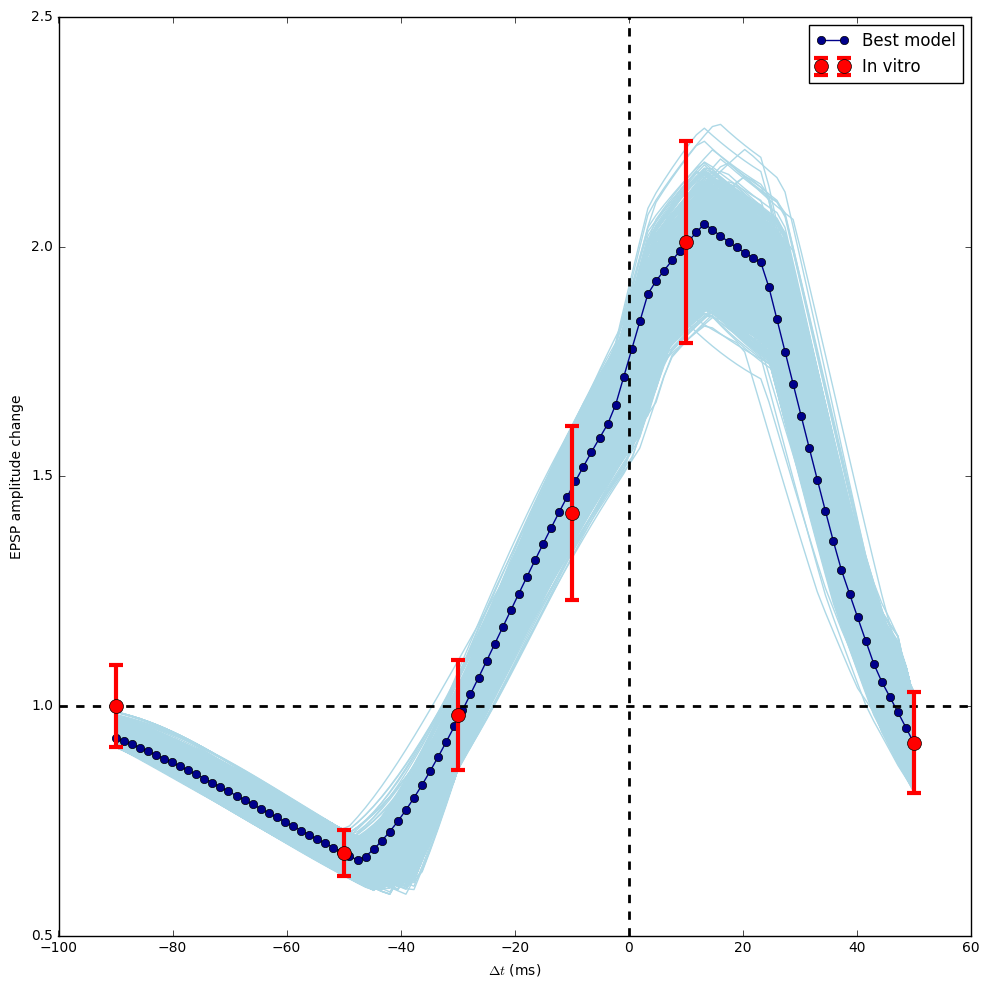

In [33]:
run_fit.plot_dt_scan(best_ind_dict, good_solutions, dt, sg, stderr)

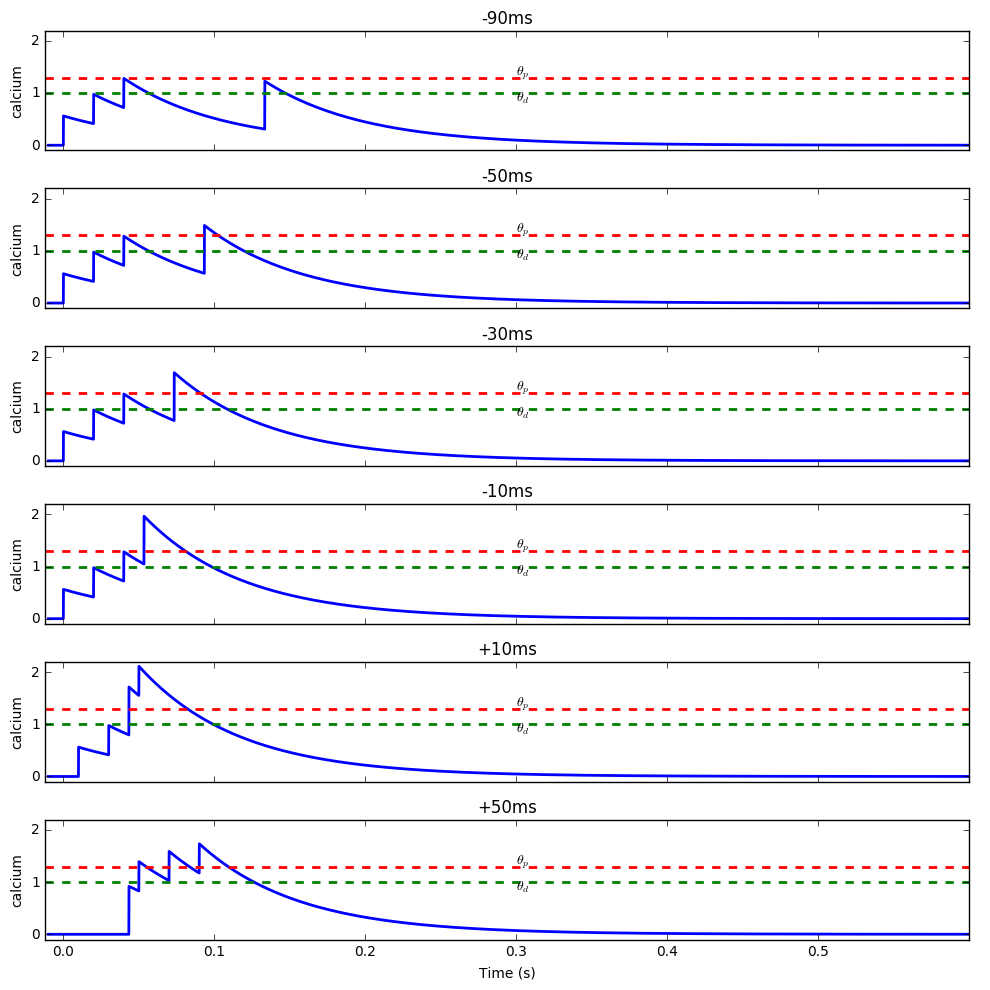

In [34]:
run_fit.plot_calcium_transients(protocols, best_ind_dict)

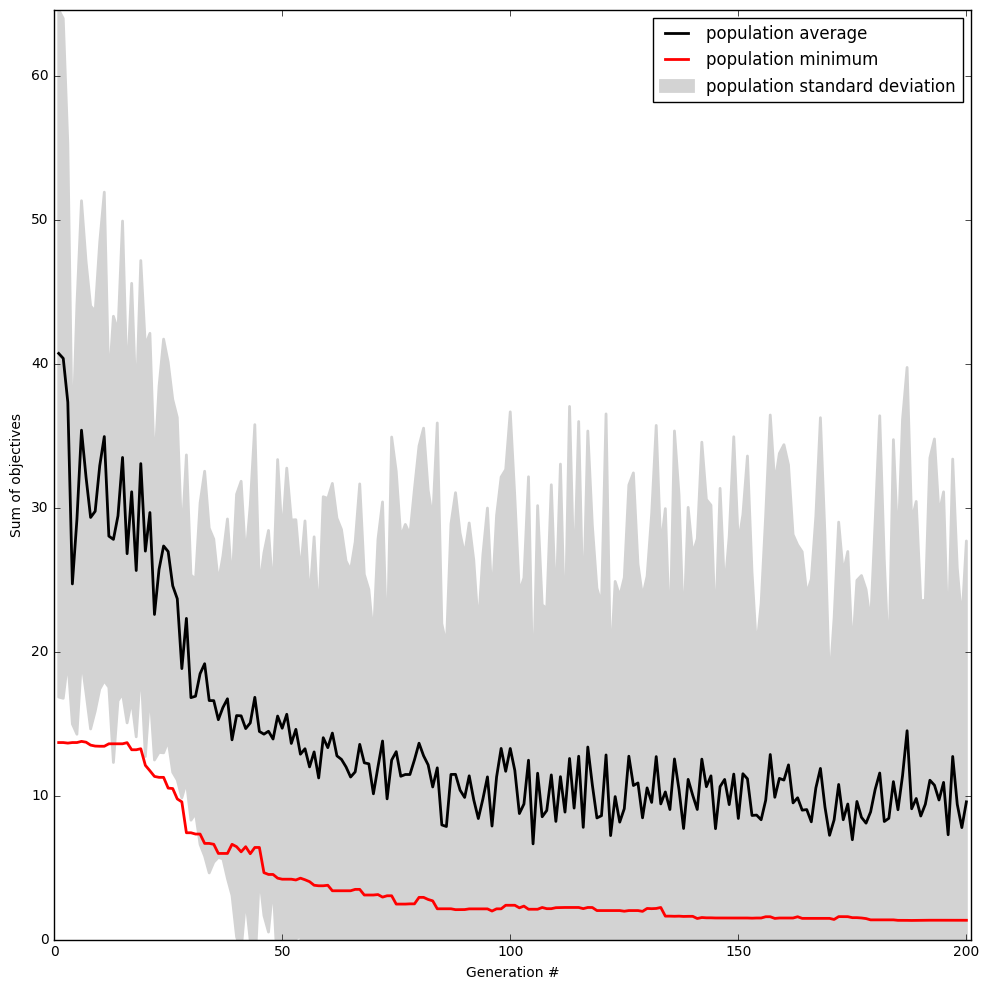

In [37]:
run_fit.plot_log(log)